<a href="https://colab.research.google.com/github/Sindhu1024/COVID-19-casestudy/blob/main/Covid_19_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
#1.DATA LOADING
df_deaths=pd.read_excel('/content/covid_19_dataset-1718175635.xlsx',sheet_name='covid_19_deaths_v1')
df_confirmed=pd.read_excel('/content/covid_19_dataset-1718175635.xlsx',sheet_name='covid_19_confirmed_v1')
df_recovered=pd.read_excel('/content/covid_19_dataset-1718175635.xlsx',sheet_name='covid_19_recovered_v1')

In [3]:
#2 DATA EXPLORATION
#1.After loading the datasets, what is the structure of each dataset in terms of rows, columns, and data types?
df_confirmed.dtypes
df_recovered.dtypes
df_deaths.dtypes

,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
1/22/20,int64
...,...
5/25/21,int64
5/26/21,int64
5/27/21,int64
5/28/21,int64


,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
1/22/20,int64
...,...
5/25/21,int64
5/26/21,int64
5/27/21,int64
5/28/21,int64


,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
1/22/20,int64
...,...
5/25/21,int64
5/26/21,int64
5/27/21,int64
5/28/21,int64


,5/29/21
Country/Region,
US,33251939
India,27894800
Brazil,16471600
France,5719877
Turkey,5235978


<Figure size 1600x900 with 0 Axes>

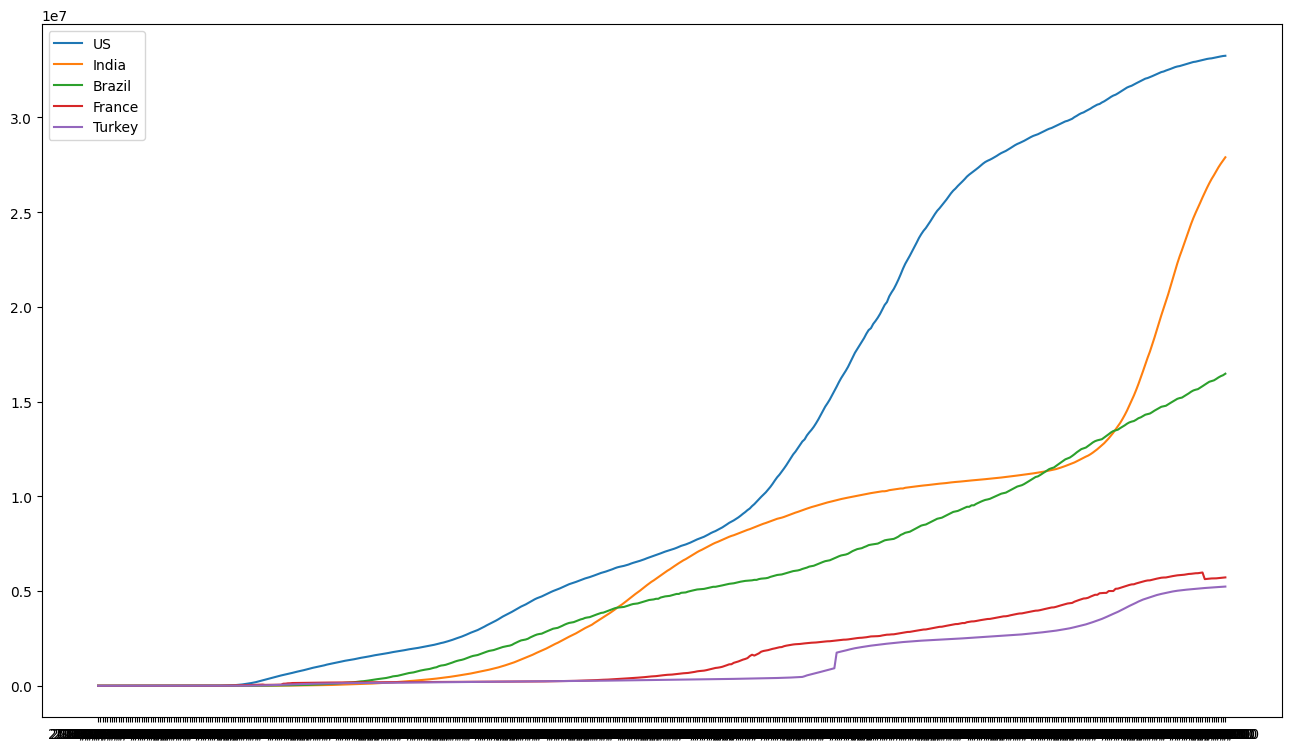

In [4]:
#2.Generate plots of confirmed cases over time for top countries.
# First we need to find the top countries.
cols=df_confirmed.columns.tolist()
cols=cols[4:] #select the date columns
x=df_confirmed.groupby('Country/Region')[cols].sum()
last_date=x.iloc[:,-1]
last_date.sort_values(ascending=False).head(5)
top_countries=['US','India','Brazil','France','Turkey']


#Plotting
x.columns=x.columns.astype(str)
plt.figure(figsize=(16,9))
for country in top_countries:
  plt.plot(x.loc[country,:],label=country)
plt.legend()
plt.show()




<Figure size 1600x900 with 0 Axes>

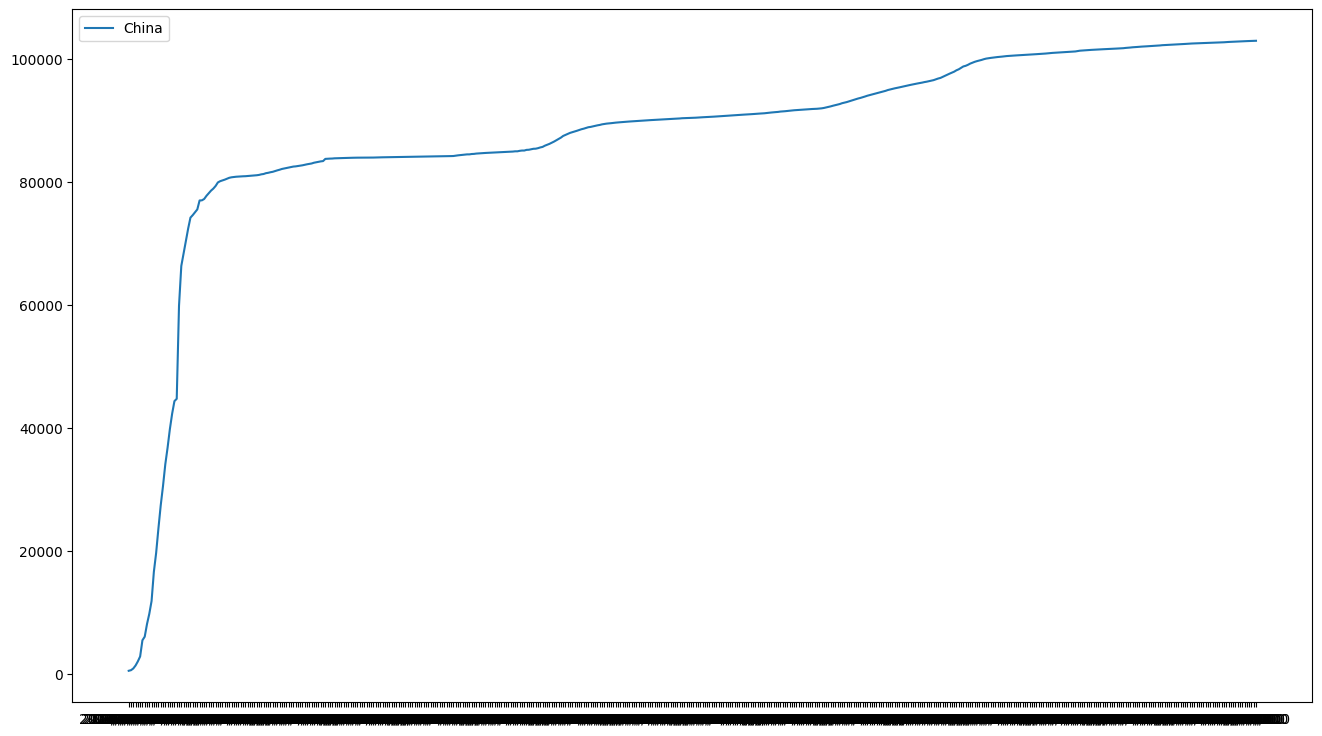

In [5]:
#3. Generate plots of confirmed cases over time for China.
plt.figure(figsize=(16,9))
plt.plot(x.loc['China',:],label='China')
plt.legend()
plt.show()

In [6]:
#HANDLING MISSING VALUES
#Identify these missing values and replace them using a suitable imputation method such as forward filling for time-series data.
#Data Cleaning and Preparation: Replace blank values in province column with "All Provinces

 #CONFIRMED DATASET

df_confirmed.isnull().sum()
df_confirmed['Province/State'].fillna('All provinces',inplace=True)
df_confirmed['Lat'].fillna(0,inplace=True)
df_confirmed['Long'].fillna(0,inplace=True)

a=df_confirmed.isnull().sum()
a[a>0]


,0
Province/State,190
Country/Region,0
Lat,2
Long,2
1/22/20,0
...,...
5/25/21,0
5/26/21,0
5/27/21,0
5/28/21,0


/tmp/ipython-input-2129078989.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_confirmed['Province/State'].fillna('All provinces',inplace=True)
/tmp/ipython-input-2129078989.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,0


In [7]:
#DEATHS DATASET

b=df_deaths.isnull().sum()
b[b>0]

df_deaths['Province/State'].fillna('All provinces',inplace=True)
df_deaths['Lat'].fillna(0,inplace=True)
df_deaths['Long'].fillna(0,inplace=True)

df_deaths['4/20/20']=df_deaths['4/20/20'].fillna(method='ffill')

b=df_deaths.isnull().sum()
b[b>0]

df_deaths['4/20/20']

,0
Province/State,190
Lat,2
Long,2
4/20/20,1


/tmp/ipython-input-45300624.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_deaths['Province/State'].fillna('All provinces',inplace=True)
/tmp/ipython-input-45300624.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,0


,4/20/20
0,36.0
1,26.0
2,26.0
3,37.0
4,2.0
...,...
271,0.0
272,2.0
273,0.0
274,3.0


In [8]:
#RECOVERED DATASET

c=df_recovered.isnull().sum()
c[c>0]

df_recovered['Province/State'].fillna('All provinces',inplace=True)
df_recovered['Lat'].fillna(0,inplace=True)
df_recovered['Long'].fillna(0,inplace=True)

df_recovered['4/20/20']=df_recovered['4/20/20'].fillna(method='ffill')

c=df_recovered.isnull().sum()
c[c>0]

,0
Province/State,191
Lat,1
Long,1
4/20/20,1


/tmp/ipython-input-1180720632.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_recovered['Province/State'].fillna('All provinces',inplace=True)
/tmp/ipython-input-1180720632.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,0


<Figure size 1600x900 with 0 Axes>

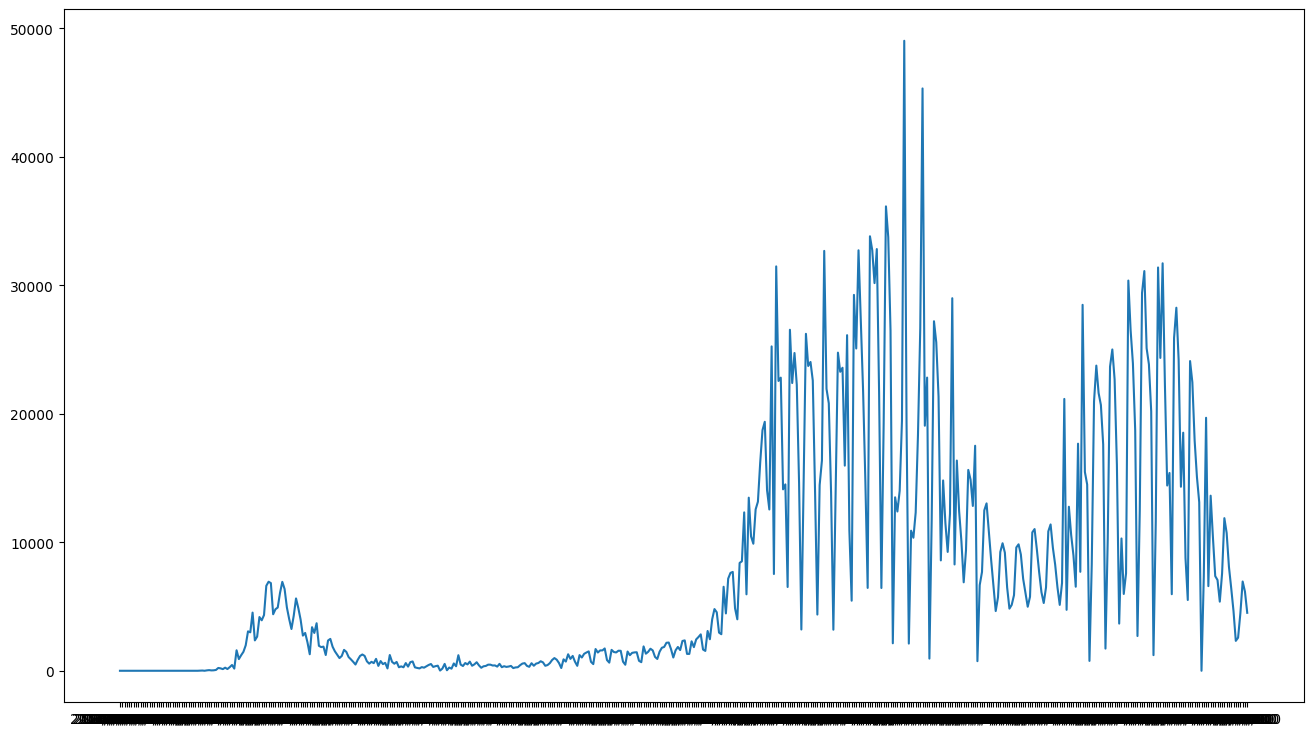

Highest number of cases recorded in Germany is 49044 on 12/30/20 


<Figure size 1600x900 with 0 Axes>

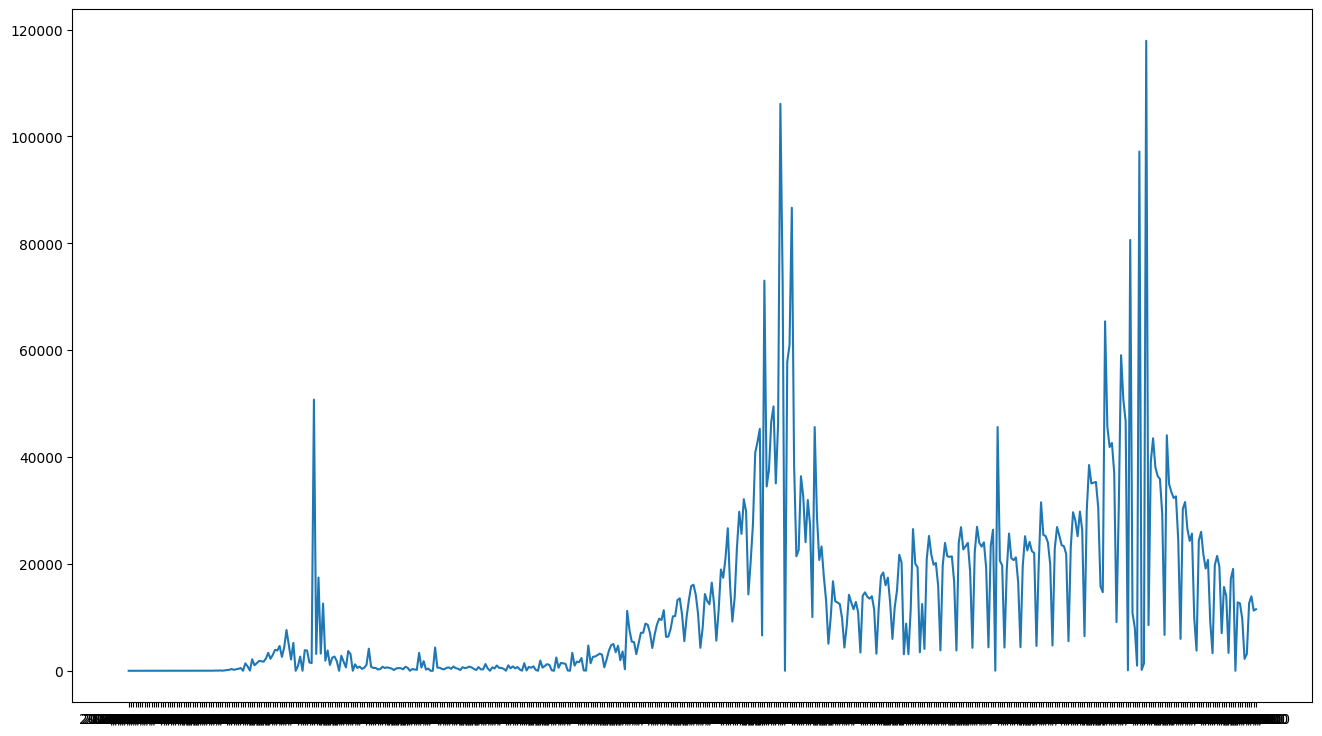

Highest number of cases recorded in France is 117900 on 2021-11-04 00:00:00 


<Figure size 1600x900 with 0 Axes>

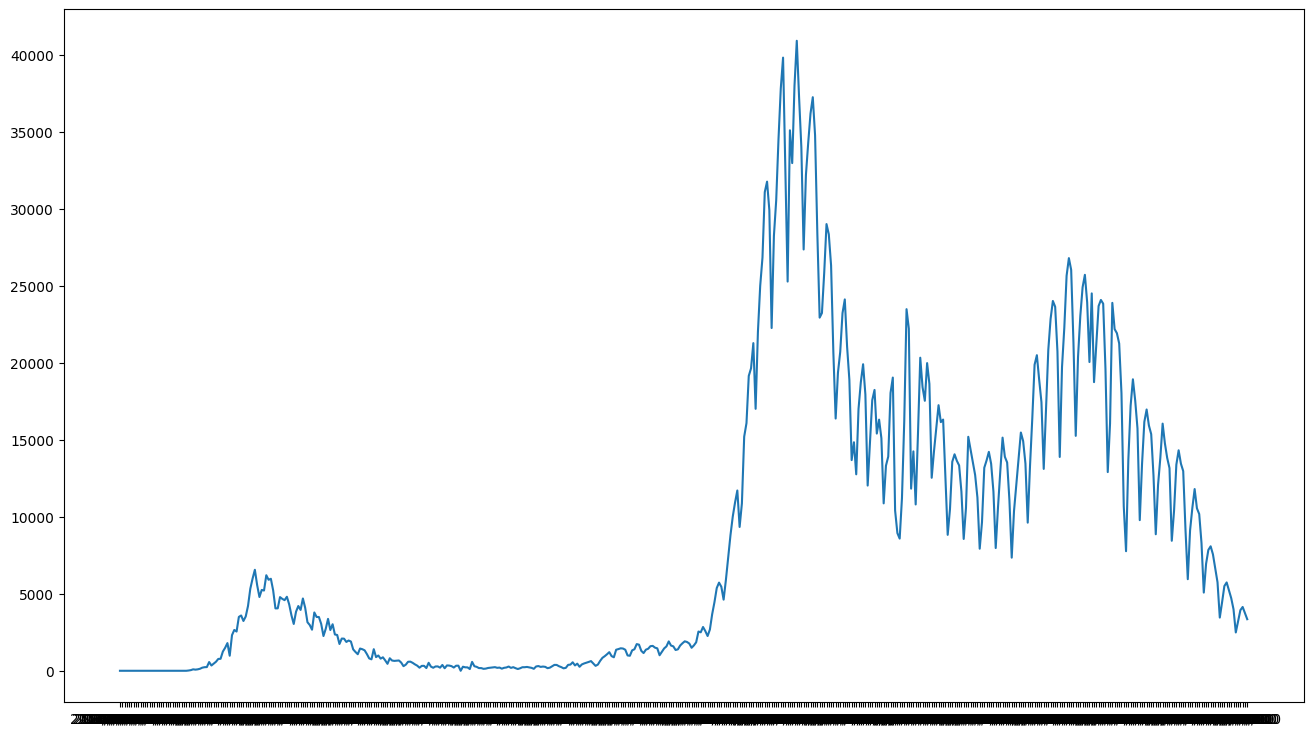

Highest number of cases recorded in Italy is 40902 on 11/13/20 


In [9]:
#Analyze the peak number of daily new cases in Germany, France, and Italy. Which country experienced the highest single-day surge, and when did it occur?

cols=df_confirmed.columns.to_list()
cols=cols[4:]

#Finding daily cases
df_confirmed_daily=df_confirmed.copy()
df_confirmed_daily[cols]=df_confirmed[cols].diff(axis=1)
df_confirmed_daily['1/22/20']=df_confirmed['1/22/20']
lolo=df_confirmed_daily['Country/Region'].isin(['Germany','France','Italy'])
confirmed3=df_confirmed_daily[lolo].groupby('Country/Region')[cols].sum()
confirmed3.columns=confirmed3.columns.astype(str)
confirmed3[confirmed3<0]=0

#GERMANY

plt.figure(figsize=(16,9))
plt.plot(confirmed3.loc['Germany',:])
plt.show()

print(f'Highest number of cases recorded in Germany is {confirmed3.loc["Germany"].max()} on {confirmed3.loc["Germany"].idxmax()} ')

#FRANCE
plt.figure(figsize=(16,9))
plt.plot(confirmed3.loc['France',:])
plt.show()

print(f'Highest number of cases recorded in France is {confirmed3.loc["France"].max()} on {confirmed3.loc["France"].idxmax()} ')


#ITALY

plt.figure(figsize=(16,9))
plt.plot(confirmed3.loc['Italy',:])
plt.show()

print(f'Highest number of cases recorded in Italy is {confirmed3.loc["Italy"].max()} on {confirmed3.loc["Italy"].idxmax()} ')


In [10]:
#Compare the recovery rates (recoveries/confirmed cases) between Canada and Australia as of December 31, 2020. Which country showed better management of the pandemic according to this metric?
reco_count=df_recovered.groupby('Country/Region')['12/31/20'].sum()
conf_count=df_confirmed.groupby('Country/Region')['12/31/20'].sum()
rr_canada=(reco_count.loc['Canada']/conf_count.loc['Canada'])*100
rr_aus=(reco_count.loc['Australia']/conf_count.loc['Australia'])*100

print(f'The recovery rate of Canada as of December 31,2020 : {rr_canada}')
print(f'The recovery rate of Australia as of December 31,2020 : {rr_aus}')


print("From the above result it can be observed that the recovery rate of Canada is higher compared to the recovery rate of Australia. This indicates that Canada showed better management of the pandemic.")


The recovery rate of Canada as of December 31,2020 : 84.46789833832128
The recovery rate of Australia as of December 31,2020 : 79.38434476693051
From the above result it can be observed that the recovery rate of Canada is higher compared to the recovery rate of Australia. This indicates that Canada showed better management of the pandemic.


In [11]:
#3. What is the distribution of death rates (deaths/confirmed cases) among provinces in Canada? Identify the province with the highest and lowest death rate as of the latest data point.

df_deaths_canada=df_deaths[df_deaths['Country/Region']=='Canada']
#df_deaths_canada.columns[-1]  latest date : 5/29/21
df_deaths_canada.groupby('Province/State')['5/29/21'].sum()
df_confirmed_canada=df_confirmed[df_confirmed['Country/Region']=='Canada']
df_confirmed_canada.groupby('Province/State')['5/29/21'].sum()

dr_canada=(df_deaths_canada.groupby('Province/State')['5/29/21'].sum()/df_confirmed_canada.groupby('Province/State')['5/29/21'].sum())*100
dr_canada


,5/29/21
Province/State,
Alberta,2214
British Columbia,1692
Diamond Princess,1
Grand Princess,0
Manitoba,1045
New Brunswick,43
Newfoundland and Labrador,6
Northwest Territories,0
Nova Scotia,84


,5/29/21
Province/State,
Alberta,226855
British Columbia,143581
Diamond Princess,0
Grand Princess,13
Manitoba,50499
New Brunswick,2191
Newfoundland and Labrador,1302
Northwest Territories,127
Nova Scotia,5530


,5/29/21
Province/State,
Alberta,0.975954
British Columbia,1.178429
Diamond Princess,inf
Grand Princess,0.000000
Manitoba,2.069348
New Brunswick,1.962574
Newfoundland and Labrador,0.460829
Northwest Territories,0.000000
Nova Scotia,1.518987


<Figure size 1600x900 with 0 Axes>

<BarContainer object of 16 artists>

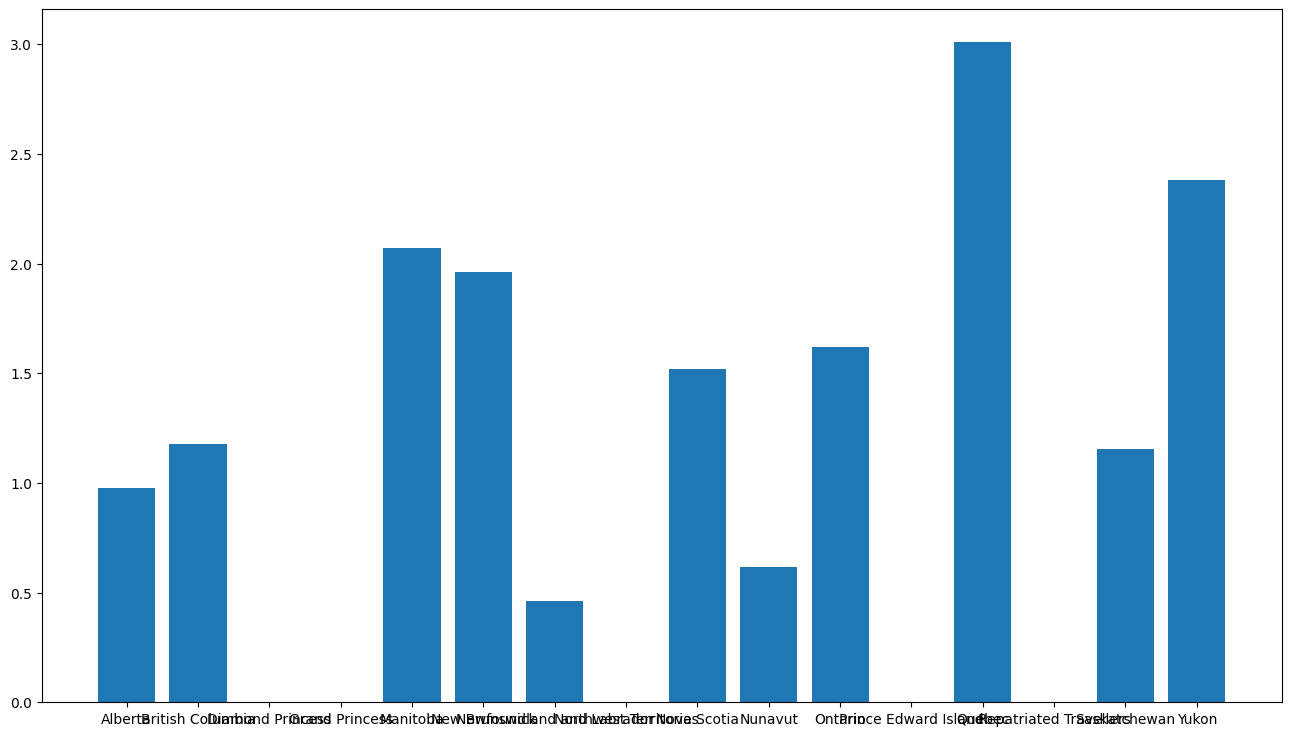

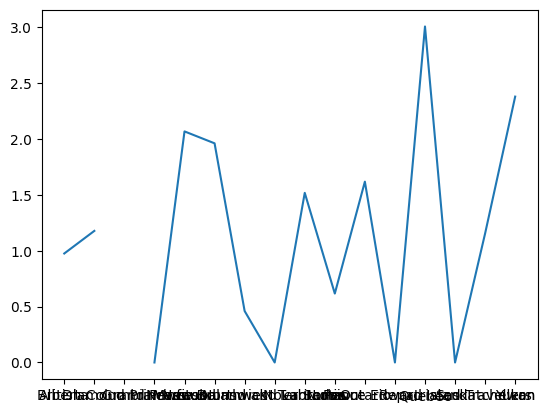

In [12]:
#continued..
plt.figure(figsize=(16,9))
plt.bar(dr_canada.index,dr_canada)
plt.show()
plt.plot(dr_canada.index,dr_canada)
plt.show()

In [13]:
#Identify the province with the highest and lowest death rate as of the latest data point.
print(f' Province with highest death rate as of 5/29/21 : {dr_canada.idxmax()}')
print(f' Province with lowest death rate as of 5/29/21 : {dr_canada.idxmin()}')


 Province with highest death rate as of 5/29/21 : Diamond Princess
 Province with lowest death rate as of 5/29/21 : Grand Princess


In [14]:
cols=df_confirmed.columns.to_list()
cols=cols[4:]

#Finding daily cases
df_deaths_daily=df_deaths.copy()
df_deaths_daily[cols]=df_deaths[cols].diff(axis=1)
df_deaths_daily['1/22/20']=df_deaths['1/22/20']
df_deaths_daily

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,All provinces,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,10,10,10,10,10,24,19,14,12,18
1,All provinces,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2,1,1,2,1,2,0,0,1,1
2,All provinces,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6,4,6,7,8,7,7,8,7,5
3,All provinces,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,All provinces,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,8,5,6,10,6,4,7,3,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,All provinces,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,2,2,1,1,1,0,1,1,1,0
272,All provinces,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,4,7,0,11,10,3,0,6,3
273,All provinces,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,3,1,2,3,3,1,2,2,1,3
274,All provinces,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,2,1,1,1,3,0,2,2,0,1


In [15]:
#6. Data Transformation
#1. Transform the 'deaths' dataset from wide format (where each column represents a date) to long format where each row represents a single date and columns are now country names, ensuring that the date column is in datetime format. How would this transformation be executed?

death_melted_d=pd.melt(df_deaths_daily,id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Daily Deaths')
pd.to_datetime(death_melted_d['Date'])


/tmp/ipython-input-1934057468.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(death_melted_d['Date'])


,Date
0,2020-01-22
1,2020-01-22
2,2020-01-22
3,2020-01-22
4,2020-01-22
...,...
136339,2021-05-29
136340,2021-05-29
136341,2021-05-29
136342,2021-05-29


In [16]:
death_melted_d['Date']=pd.to_datetime(death_melted_d['Date'],format='%m/%d/%y')
#death_melted.sort_values(by=['Country/Region','Province/State'])



In [17]:
death_melted_d

,Province/State,Country/Region,Lat,Long,Date,Daily Deaths
0,All provinces,Afghanistan,33.939110,67.709953,2020-01-22,0.0
1,All provinces,Albania,41.153300,20.168300,2020-01-22,0.0
2,All provinces,Algeria,28.033900,1.659600,2020-01-22,0.0
3,All provinces,Andorra,42.506300,1.521800,2020-01-22,0.0
4,All provinces,Angola,-11.202700,17.873900,2020-01-22,0.0
...,...,...,...,...,...,...
136339,All provinces,Vietnam,14.058324,108.277199,2021-05-29,0.0
136340,All provinces,West Bank and Gaza,31.952200,35.233200,2021-05-29,3.0
136341,All provinces,Yemen,15.552727,48.516388,2021-05-29,3.0
136342,All provinces,Zambia,-13.133897,27.849332,2021-05-29,1.0


In [18]:
#2. What is the total number of deaths reported per country up to the current date?
death_melted_d.groupby('Country/Region')['Daily Deaths'].sum()


,Daily Deaths
Country/Region,
Afghanistan,2899.0
Albania,2449.0
Algeria,3460.0
Andorra,127.0
Angola,757.0
...,...
Vietnam,47.0
West Bank and Gaza,3492.0
Yemen,1319.0


In [19]:
#What are the top 5 countries with the highest average daily deaths?
death_melted_d.groupby('Country/Region')['Daily Deaths'].mean().sort_values(ascending=False).head(5)

,Daily Deaths
Country/Region,
US,1203.048583
Brazil,933.313765
India,659.862348
Mexico,452.338057
Italy,255.064777


<Figure size 1600x900 with 0 Axes>

/tmp/ipython-input-3591674485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_us['Date']=pd.to_datetime(df1_us['Date'])


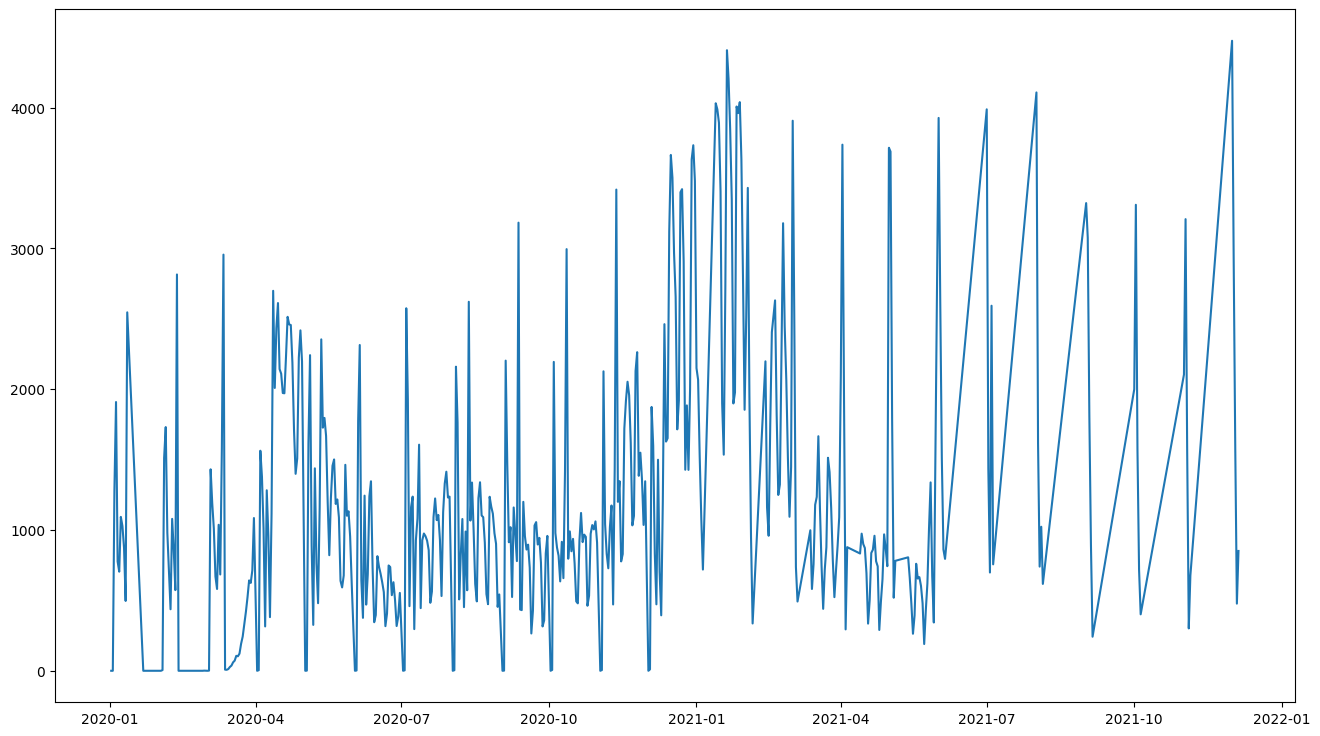

In [20]:
#How have the total deaths evolved over time in the United States?

plt.figure(figsize=(16,9))
df1_us=death_melted_d.loc[death_melted_d['Country/Region']=='US']
df1_us['Date']=pd.to_datetime(df1_us['Date'])
plt.plot(df1_us.groupby('Date')['Daily Deaths'].sum().sort_index())

In [21]:
#7. Data Merging
#1. How would you merge the transformed datasets of confirmed cases, deaths, and recoveries on the 'Country/Region' and 'Date' columns to create a comprehensive view of the pandemic's impact?

#daily cases of recovered dataset

cols=df_confirmed.columns.to_list()
cols=cols[4:]

#Finding daily cases
df_recovery_daily=df_recovered.copy()
df_recovery_daily[cols]=df_recovered[cols].diff(axis=1)
df_recovery_daily['1/22/20']=df_deaths['1/22/20']
df_recovery_daily

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,All provinces,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,158,103,99,146,260,223,193,251,157,162
1,All provinces,Albania,41.153300,20.168300,0,0,0,0,0,0,...,629,556,176,131,94,81,71,64,55,118
2,All provinces,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,156,164,142,138,151,175,189,179,192,187
3,All provinces,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,29,118,24,11,0
4,All provinces,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,25,30,262,3,309,117,263,62,48,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,All provinces,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,0,2,32,0,73,0,59,0,43,0
257,All provinces,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,1258,300,0,1301,522,535,0,566,399
258,All provinces,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,39,20,22,44,15,13,33,33,36,24
259,All provinces,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,36,64,83,54,44,21,18,82,122,151


In [22]:
#melting confirmed and recovered datasets

confirmed_melted_d=pd.melt(df_confirmed_daily,id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Confirmed')
pd.to_datetime(confirmed_melted_d['Date'])
confirmed_melted_d['Date']=pd.to_datetime(confirmed_melted_d['Date'],format='%m/%d/%y')


recovered_melted_d=pd.melt(df_recovery_daily,id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Recovered')
pd.to_datetime(recovered_melted_d['Date'])
recovered_melted_d['Date']=pd.to_datetime(recovered_melted_d['Date'],format='%m/%d/%y')

/tmp/ipython-input-3008413960.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(confirmed_melted_d['Date'])


,Date
0,2020-01-22
1,2020-01-22
2,2020-01-22
3,2020-01-22
4,2020-01-22
...,...
136339,2021-05-29
136340,2021-05-29
136341,2021-05-29
136342,2021-05-29


/tmp/ipython-input-3008413960.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(recovered_melted_d['Date'])


,Date
0,2020-01-22
1,2020-01-22
2,2020-01-22
3,2020-01-22
4,2020-01-22
...,...
128929,2021-05-29
128930,2021-05-29
128931,2021-05-29
128932,2021-05-29


In [23]:
confirmed_melted=pd.melt(df_confirmed,id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Confirmed')
pd.to_datetime(confirmed_melted['Date'])
confirmed_melted['Date']=pd.to_datetime(confirmed_melted['Date'],format='%m/%d/%y')


recovered_melted=pd.melt(df_recovered,id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Recovered')
pd.to_datetime(recovered_melted['Date'])
recovered_melted['Date']=pd.to_datetime(recovered_melted['Date'],format='%m/%d/%y')

deaths_melted=pd.melt(df_deaths,id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Deaths')
pd.to_datetime(deaths_melted['Date'])
deaths_melted['Date']=pd.to_datetime(deaths_melted['Date'],format='%m/%d/%y')

/tmp/ipython-input-586303180.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(confirmed_melted['Date'])


,Date
0,2020-01-22
1,2020-01-22
2,2020-01-22
3,2020-01-22
4,2020-01-22
...,...
136339,2021-05-29
136340,2021-05-29
136341,2021-05-29
136342,2021-05-29


/tmp/ipython-input-586303180.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(recovered_melted['Date'])


,Date
0,2020-01-22
1,2020-01-22
2,2020-01-22
3,2020-01-22
4,2020-01-22
...,...
128929,2021-05-29
128930,2021-05-29
128931,2021-05-29
128932,2021-05-29


/tmp/ipython-input-586303180.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(deaths_melted['Date'])


,Date
0,2020-01-22
1,2020-01-22
2,2020-01-22
3,2020-01-22
4,2020-01-22
...,...
136339,2021-05-29
136340,2021-05-29
136341,2021-05-29
136342,2021-05-29


In [24]:
pd.to_datetime(recovered_melted['Date'])
recovered_melted['Date']=pd.to_datetime(recovered_melted['Date'],format='%m/%d/%y')

,Date
0,2020-01-22
1,2020-01-22
2,2020-01-22
3,2020-01-22
4,2020-01-22
...,...
128929,2021-05-29
128930,2021-05-29
128931,2021-05-29
128932,2021-05-29


In [25]:
recovered_melted['Date'].dtypes


dtype('<M8[ns]')

In [26]:
deaths_melted.dtypes
confirmed_melted.dtypes
recovered_melted.dtypes

death_melted_d.dtypes
confirmed_melted_d.dtypes
recovered_melted_d.dtypes

,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
Date,datetime64[ns]
Deaths,float64


,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
Date,datetime64[ns]
Confirmed,int64


,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
Date,datetime64[ns]
Recovered,float64


,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
Date,datetime64[ns]
Daily Deaths,float64


,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
Date,datetime64[ns]
Confirmed,int64


,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
Date,datetime64[ns]
Recovered,float64


In [27]:
deaths_melted=deaths_melted.sort_values(by=['Country/Region','Province/State','Date'])
confirmed_melted=confirmed_melted.sort_values(by=['Country/Region','Province/State','Date'])
recovered_melted=recovered_melted.sort_values(by=['Country/Region','Province/State','Date'])

In [28]:
deaths_melted['deaths_daily_cases'] = deaths_melted.groupby(['Province/State', 'Country/Region'])['Deaths'].diff()
confirmed_melted['confirmed_daily_cases'] = confirmed_melted.groupby(['Province/State', 'Country/Region'])['Confirmed'].diff()
recovered_melted['recovered_daily_cases'] = recovered_melted.groupby(['Province/State', 'Country/Region'])['Recovered'].diff()


In [29]:
deaths_melted=deaths_melted.fillna(0.0)
confirmed_melted=confirmed_melted.fillna(0.0)
recovered_melted=recovered_melted.fillna(0.0)

In [30]:
deaths_melted
confirmed_melted
recovered_melted

,Province/State,Country/Region,Lat,Long,Date,Deaths,deaths_daily_cases
2760,All provinces,Afghanistan,33.939110,67.709953,2020-01-02,0.0,0.0
10764,All provinces,Afghanistan,33.939110,67.709953,2020-01-03,0.0,0.0
19320,All provinces,Afghanistan,33.939110,67.709953,2020-01-04,4.0,4.0
27600,All provinces,Afghanistan,33.939110,67.709953,2020-01-05,68.0,64.0
36156,All provinces,Afghanistan,33.939110,67.709953,2020-01-06,266.0,198.0
...,...,...,...,...,...,...,...
98531,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-01,551.0,-1028.0
107087,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-02,1393.0,842.0
114815,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-03,1496.0,103.0
123371,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-04,1542.0,46.0


,Province/State,Country/Region,Lat,Long,Date,Confirmed,confirmed_daily_cases
2760,All provinces,Afghanistan,33.939110,67.709953,2020-01-02,0,0.0
10764,All provinces,Afghanistan,33.939110,67.709953,2020-01-03,1,1.0
19320,All provinces,Afghanistan,33.939110,67.709953,2020-01-04,197,196.0
27600,All provinces,Afghanistan,33.939110,67.709953,2020-01-05,2291,2094.0
36156,All provinces,Afghanistan,33.939110,67.709953,2020-01-06,15753,13462.0
...,...,...,...,...,...,...,...
98531,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-01,23239,-15209.0
107087,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-02,35045,11806.0
114815,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-03,36423,1378.0
123371,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-04,37307,884.0


,Province/State,Country/Region,Lat,Long,Date,Recovered,recovered_daily_cases
2610,All provinces,Afghanistan,33.939110,67.709953,2020-01-02,0.0,0.0
10179,All provinces,Afghanistan,33.939110,67.709953,2020-01-03,0.0,0.0
18270,All provinces,Afghanistan,33.939110,67.709953,2020-01-04,5.0,5.0
26100,All provinces,Afghanistan,33.939110,67.709953,2020-01-05,310.0,305.0
34191,All provinces,Afghanistan,33.939110,67.709953,2020-01-06,1428.0,1118.0
...,...,...,...,...,...,...,...
93176,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-01,13396.0,-22825.0
101267,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-02,29959.0,16563.0
108575,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-03,33996.0,4037.0
116666,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-04,34901.0,905.0


In [31]:
#merging
df_combined = confirmed_melted.merge(deaths_melted[['Province/State', 'Country/Region','Date','Deaths', 'deaths_daily_cases' ]],
               on = ['Province/State', 'Country/Region', 'Date'], how = 'left')
df_combined

,Province/State,Country/Region,Lat,Long,Date,Confirmed,confirmed_daily_cases,Deaths,deaths_daily_cases
0,All provinces,Afghanistan,33.939110,67.709953,2020-01-02,0,0.0,0.0,0.0
1,All provinces,Afghanistan,33.939110,67.709953,2020-01-03,1,1.0,0.0,0.0
2,All provinces,Afghanistan,33.939110,67.709953,2020-01-04,197,196.0,4.0,4.0
3,All provinces,Afghanistan,33.939110,67.709953,2020-01-05,2291,2094.0,68.0,64.0
4,All provinces,Afghanistan,33.939110,67.709953,2020-01-06,15753,13462.0,266.0,198.0
...,...,...,...,...,...,...,...,...,...
136339,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-01,23239,-15209.0,551.0,-1028.0
136340,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-02,35045,11806.0,1393.0,842.0
136341,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-03,36423,1378.0,1496.0,103.0
136342,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-04,37307,884.0,1542.0,46.0


In [32]:
df_every=df_combined.merge(recovered_melted[['Province/State', 'Country/Region','Date','Recovered', 'recovered_daily_cases']],on=['Province/State', 'Country/Region', 'Date'], how = 'left')

df_every

,Province/State,Country/Region,Lat,Long,Date,Confirmed,confirmed_daily_cases,Deaths,deaths_daily_cases,Recovered,recovered_daily_cases
0,All provinces,Afghanistan,33.939110,67.709953,2020-01-02,0,0.0,0.0,0.0,0.0,0.0
1,All provinces,Afghanistan,33.939110,67.709953,2020-01-03,1,1.0,0.0,0.0,0.0,0.0
2,All provinces,Afghanistan,33.939110,67.709953,2020-01-04,197,196.0,4.0,4.0,5.0,5.0
3,All provinces,Afghanistan,33.939110,67.709953,2020-01-05,2291,2094.0,68.0,64.0,310.0,305.0
4,All provinces,Afghanistan,33.939110,67.709953,2020-01-06,15753,13462.0,266.0,198.0,1428.0,1118.0
...,...,...,...,...,...,...,...,...,...,...,...
136339,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-01,23239,-15209.0,551.0,-1028.0,13396.0,-22825.0
136340,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-02,35045,11806.0,1393.0,842.0,29959.0,16563.0
136341,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-03,36423,1378.0,1496.0,103.0,33996.0,4037.0
136342,All provinces,Zimbabwe,-19.015438,29.154857,2021-12-04,37307,884.0,1542.0,46.0,34901.0,905.0


<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Monthly Pandemic Progression in US')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Cases')

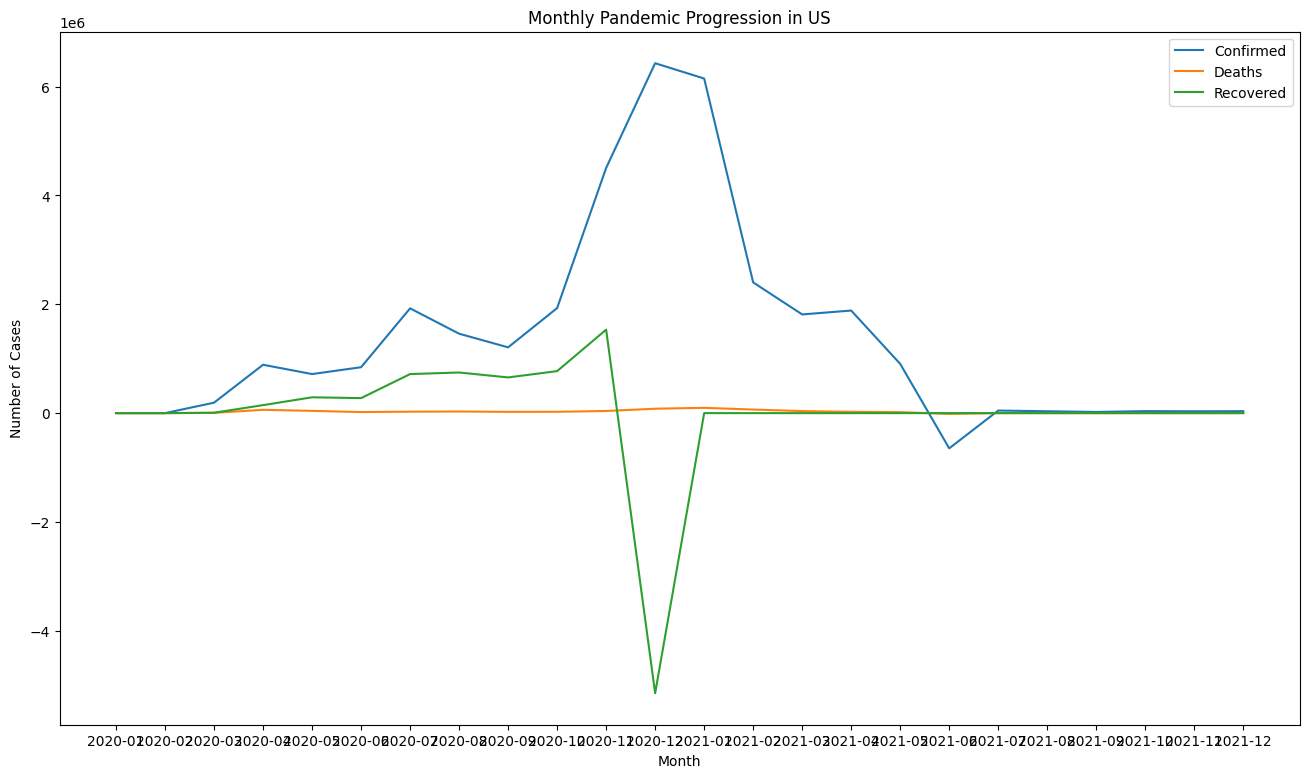

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Monthly Pandemic Progression in Brazil')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Cases')

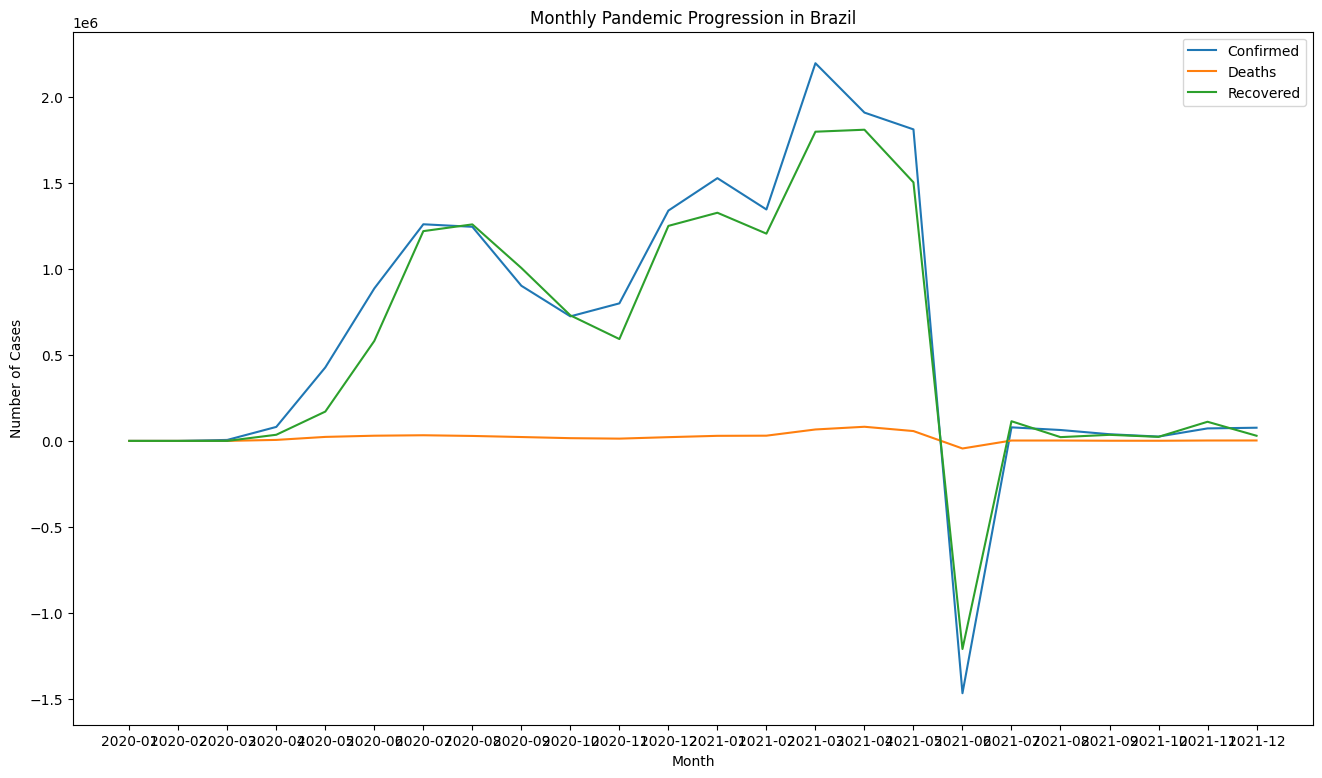

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Monthly Pandemic Progression in India')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Cases')

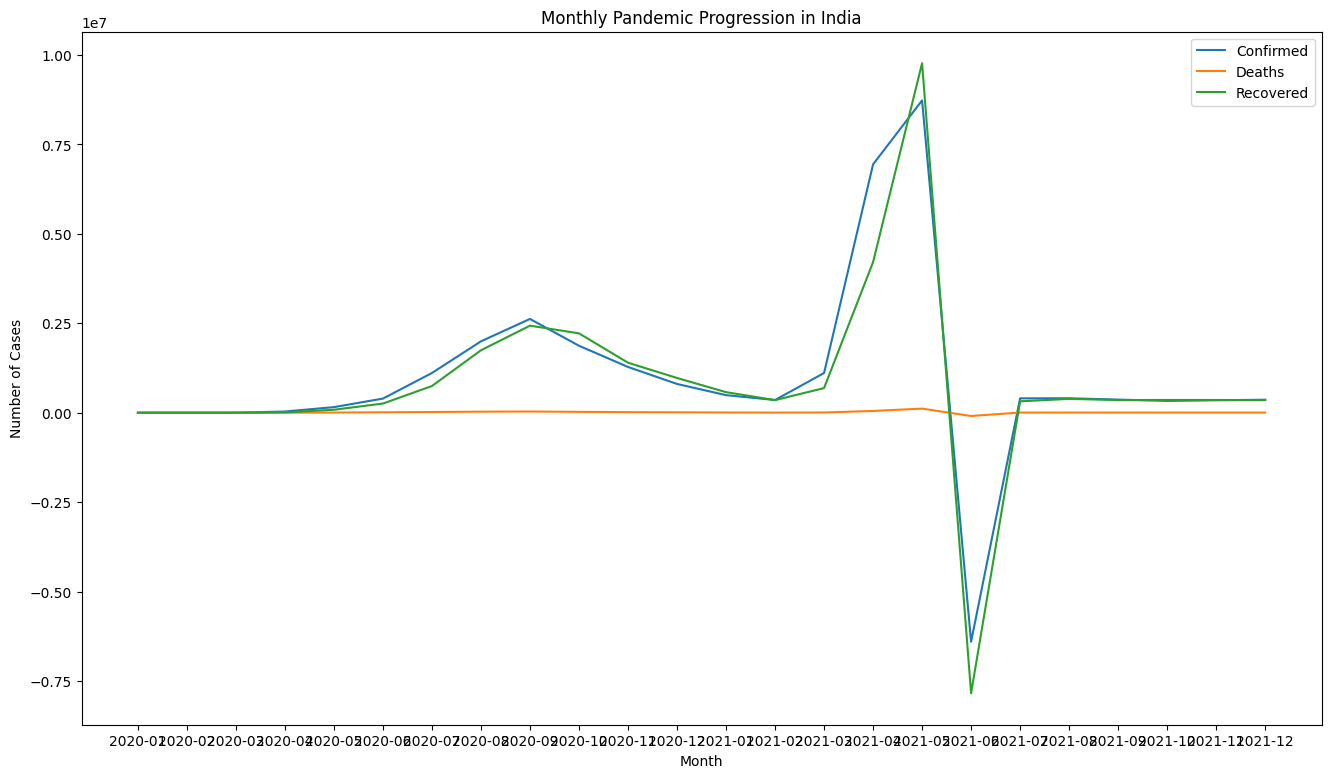

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Monthly Pandemic Progression in Mexico')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Cases')

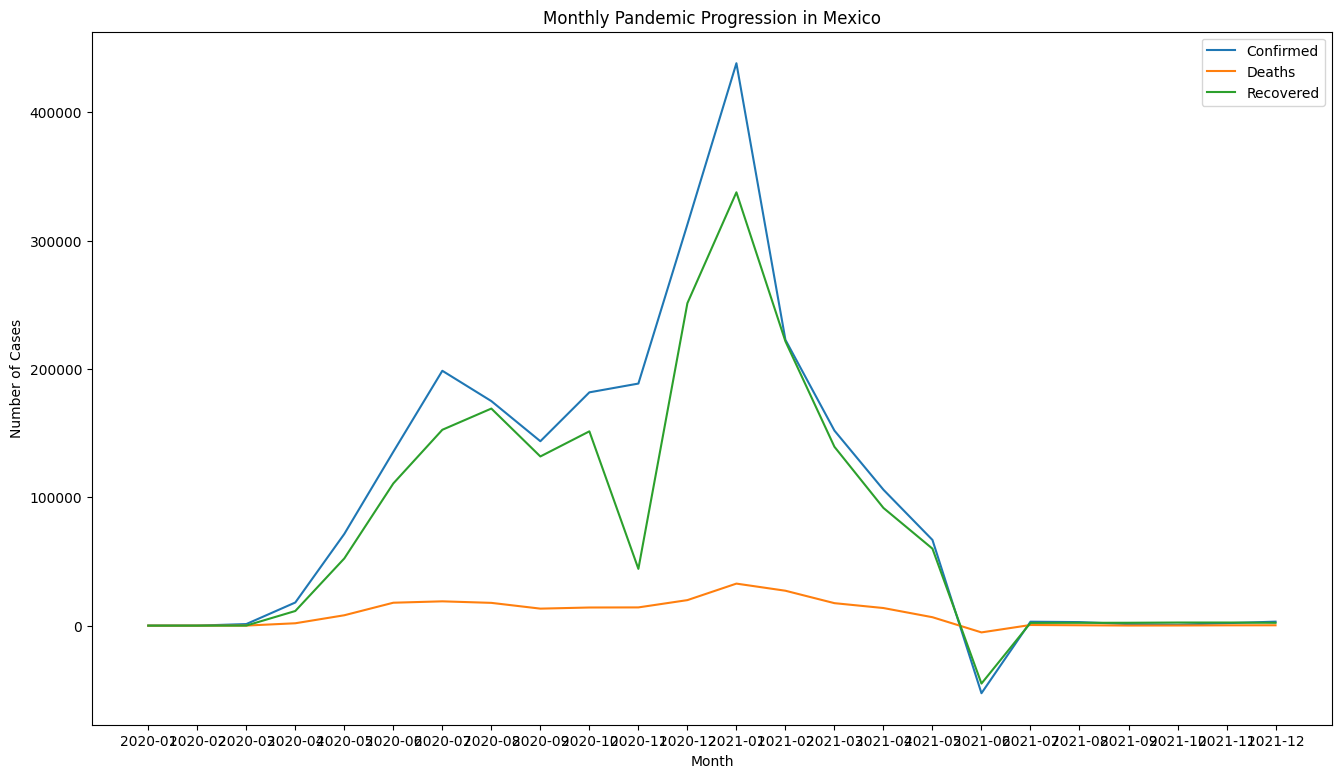

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Monthly Pandemic Progression in Italy')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Cases')

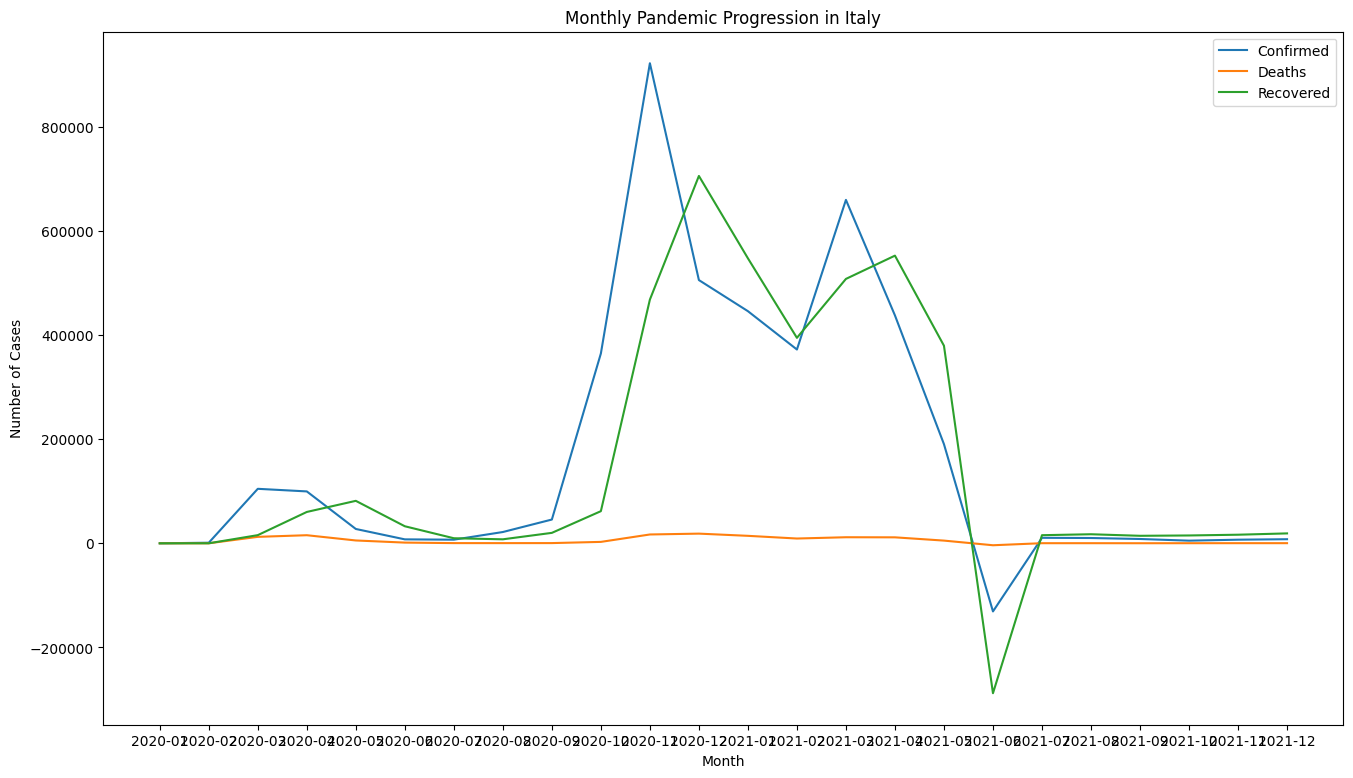

In [33]:
#Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic.[From the merged dataset]

df_every['month'] = df_every['Date'].dt.strftime('%Y-%m')
df_monthly = df_every.groupby(['Country/Region', 'month'])[['confirmed_daily_cases', 'deaths_daily_cases', 'recovered_daily_cases']].sum().reset_index()

top_5_countries = ['US', 'Brazil', 'India', 'Mexico', 'Italy']
df_monthly_top5 = df_monthly[df_monthly['Country/Region'].isin(top_5_countries)]

for country in top_5_countries:
    df_country = df_monthly_top5[df_monthly_top5['Country/Region'] == country]
    plt.figure(figsize=(16,9))
    plt.plot(df_country['month'], df_country['confirmed_daily_cases'], label='Confirmed')
    plt.plot(df_country['month'], df_country['deaths_daily_cases'], label='Deaths')
    plt.plot(df_country['month'], df_country['recovered_daily_cases'], label='Recovered')
    plt.title(f'Monthly Pandemic Progression in {country}')
    plt.xlabel('Month')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.show()

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Monthly Pandemic Progression in US')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Cases')

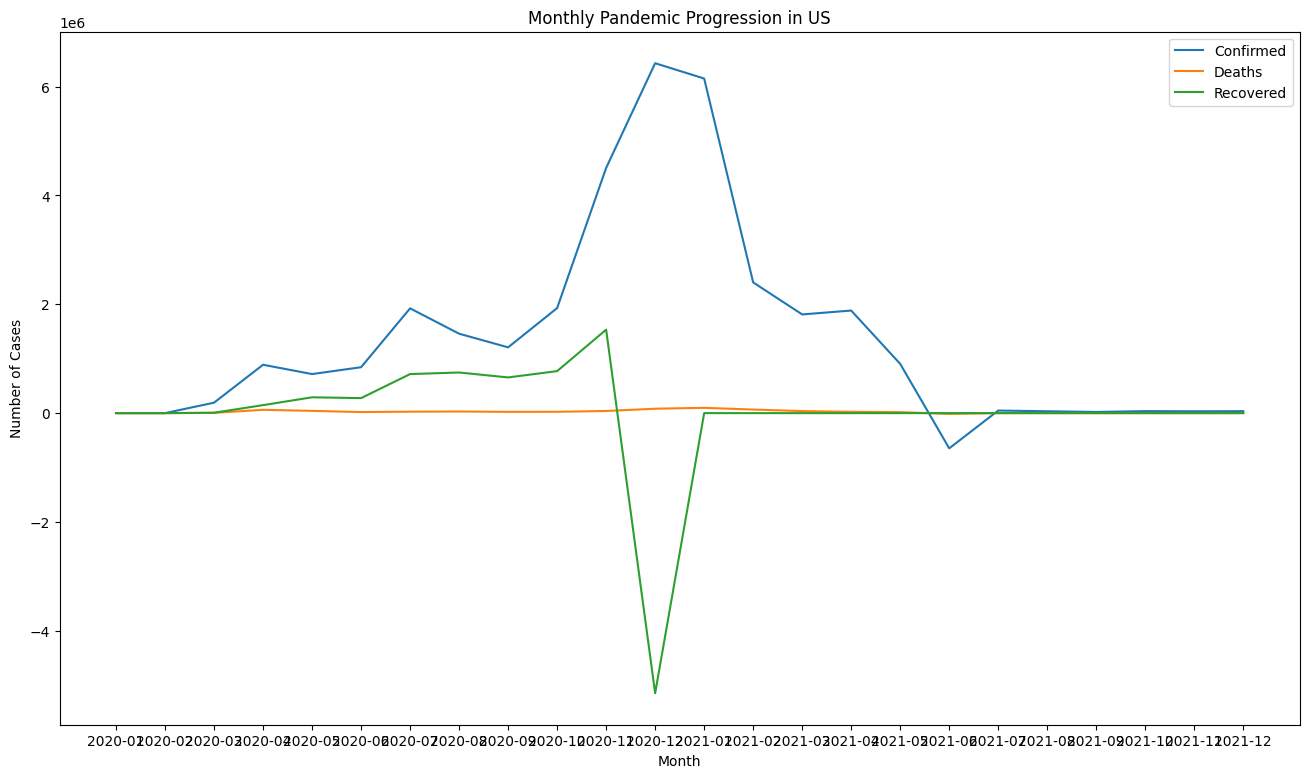

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Monthly Pandemic Progression in Italy')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Cases')

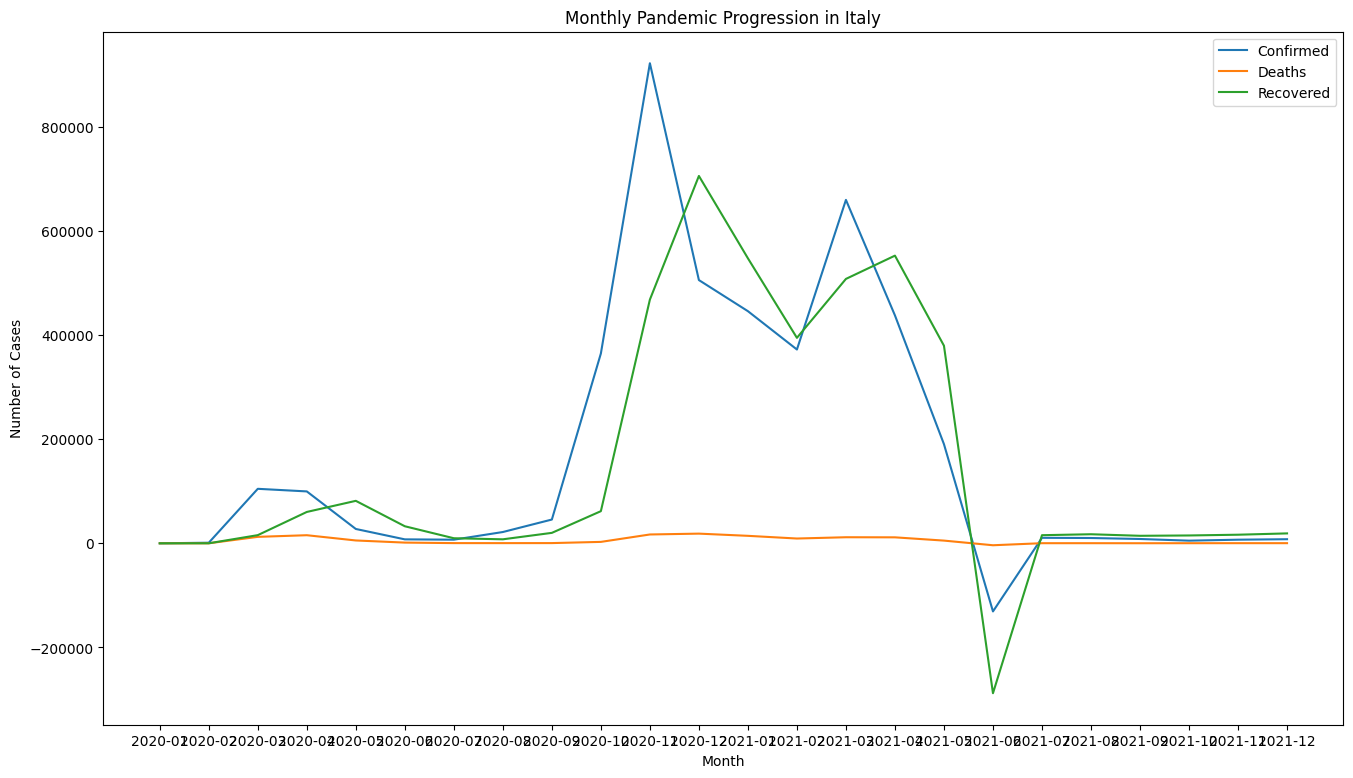

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Monthly Pandemic Progression in Brazil')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Cases')

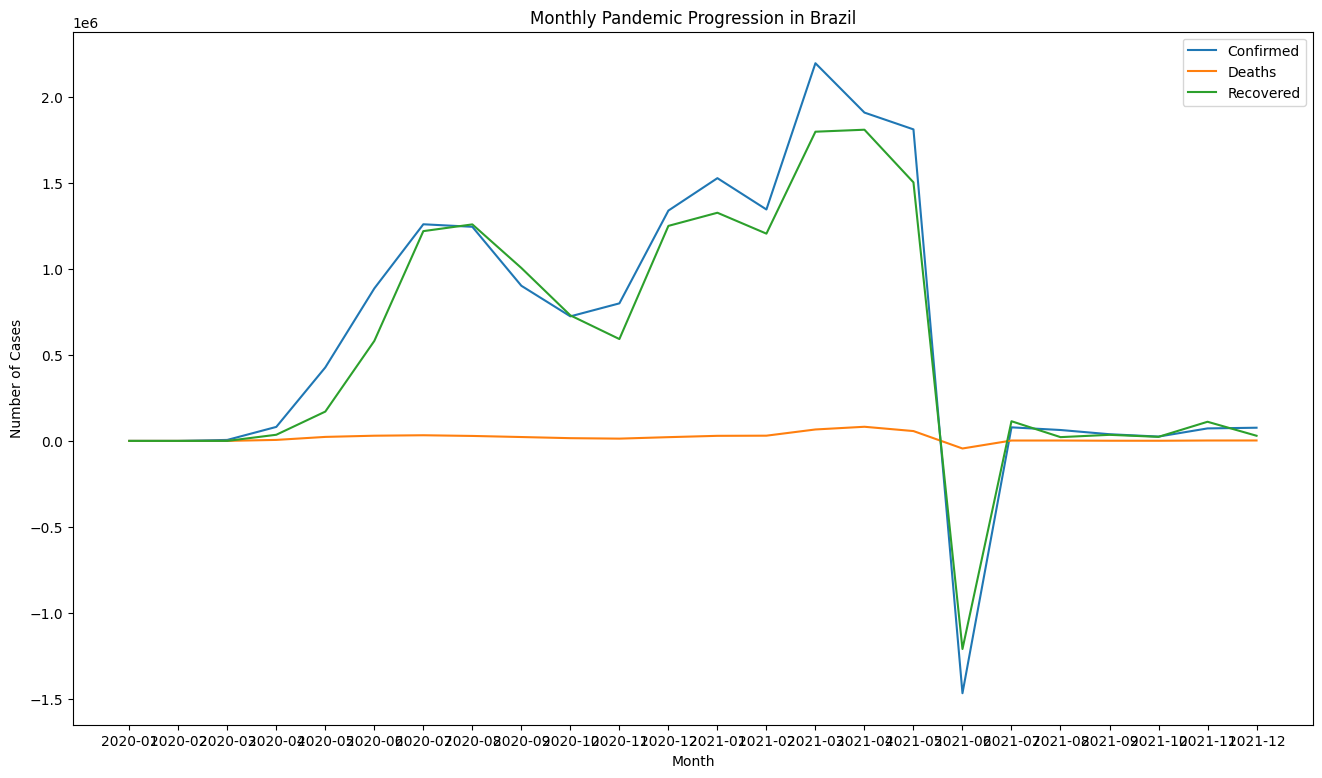

In [34]:
#3. Redo the analysis in last question for United States, Italy and Brazil.

df_every['month'] = df_every['Date'].dt.strftime('%Y-%m')
df_monthly = df_every.groupby(['Country/Region', 'month'])[['confirmed_daily_cases', 'deaths_daily_cases', 'recovered_daily_cases']].sum().reset_index()

top_5_countries = ['US', 'Italy', 'Brazil']
df_monthly_top5 = df_monthly[df_monthly['Country/Region'].isin(top_5_countries)]

for country in top_5_countries:
    df_country = df_monthly_top5[df_monthly_top5['Country/Region'] == country]
    plt.figure(figsize=(16,9))
    plt.plot(df_country['month'], df_country['confirmed_daily_cases'], label='Confirmed')
    plt.plot(df_country['month'], df_country['deaths_daily_cases'], label='Deaths')
    plt.plot(df_country['month'], df_country['recovered_daily_cases'], label='Recovered')
    plt.title(f'Monthly Pandemic Progression in {country}')
    plt.xlabel('Month')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.show()

In [44]:
#8. Combined Data Analysis

#1. For the combined dataset, identify the three countries with the highest average death rates (deaths/confirmed cases) throughout 2020. What might this indicate about the pandemic's impact in these countries?

df_every['month'] = df_every['Date'].dt.strftime('%Y-%m')
df_monthly = df_every.groupby(['Country/Region', 'month'])[['confirmed_daily_cases', 'deaths_daily_cases', 'recovered_daily_cases']].sum().reset_index()
df_monthly_2020=df_monthly[df_monthly['month'].isin(['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12'])]
df_monthly_2020['death_rate'] = (df_monthly_2020['deaths_daily_cases']/df_monthly_2020['confirmed_daily_cases'])*100
df_monthly_2020.sort_values(by='death_rate',ascending=False).head(3)
#top_3_countries_2020 = df_monthly_2020.groupby('Country/Region')['death_rate'].mean().sort_values(ascending=False).head(3)
#print("Top 3 countries with the highest average death rates in 2020:")
#print(top_3_countries_2020)

/tmp/ipython-input-1078496596.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly_2020['death_rate'] = (df_monthly_2020['deaths_daily_cases']/df_monthly_2020['confirmed_daily_cases'])*100


,Country/Region,month,confirmed_daily_cases,deaths_daily_cases,recovered_daily_cases,death_rate
1155,Diamond Princess,2020-04,0.0,3.0,42.0,inf
581,Brunei,2020-06,0.0,1.0,0.0,inf
1447,Fiji,2020-08,1.0,1.0,5.0,100.0


In [46]:
#2. Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of COVID-19 cases in the country?

df_every_sa=df_every[df_every['Country/Region']=='South Africa']
r=df_every_sa.groupby('Country/Region')['Recovered'].sum()
d=df_every_sa.groupby('Country/Region')['Deaths'].sum()

print(f'Total number of recoveries in South Africa : {r}')
print(f'Total number of deaths in South Africa : {d}')

Total number of recoveries in South Africa : Country/Region
South Africa    310037573.0
Name: Recovered, dtype: float64
Total number of deaths in South Africa : Country/Region
South Africa    10250036.0
Name: Deaths, dtype: float64


/tmp/ipython-input-152054809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_every_2021['ratio']=df_every_2021['Recovered']/df_every_2021['Confirmed']


,Province/State,Country/Region,Lat,Long,Date,Confirmed,confirmed_daily_cases,Deaths,deaths_daily_cases,Recovered,recovered_daily_cases,month,ratio
124043,All provinces,US,40.0,-100.0,2020-03-02,11,-14.0,0.0,-1.0,0.0,-7.0,2020-03,0.000000
124044,All provinces,US,40.0,-100.0,2020-03-03,74,63.0,7.0,7.0,7.0,7.0,2020-03,0.094595
124045,All provinces,US,40.0,-100.0,2020-03-04,289087,289013.0,9596.0,9589.0,9707.0,9700.0,2020-03,0.033578
124046,All provinces,US,40.0,-100.0,2020-03-05,1167593,878506.0,71065.0,61469.0,180152.0,170445.0,2020-03,0.154293
124047,All provinces,US,40.0,-100.0,2020-03-06,1857511,689918.0,110607.0,39542.0,479258.0,299106.0,2020-03,0.258011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124448,All provinces,US,40.0,-100.0,2021-05-25,33166418,22756.0,590941.0,621.0,0.0,0.0,2021-05,0.000000
124449,All provinces,US,40.0,-100.0,2021-05-26,33190470,24052.0,591950.0,1009.0,0.0,0.0,2021-05,0.000000
124450,All provinces,US,40.0,-100.0,2021-05-27,33217995,27525.0,593288.0,1338.0,0.0,0.0,2021-05,0.000000
124451,All provinces,US,40.0,-100.0,2021-05-28,33239963,21968.0,593963.0,675.0,0.0,0.0,2021-05,0.000000


<Figure size 1600x900 with 0 Axes>

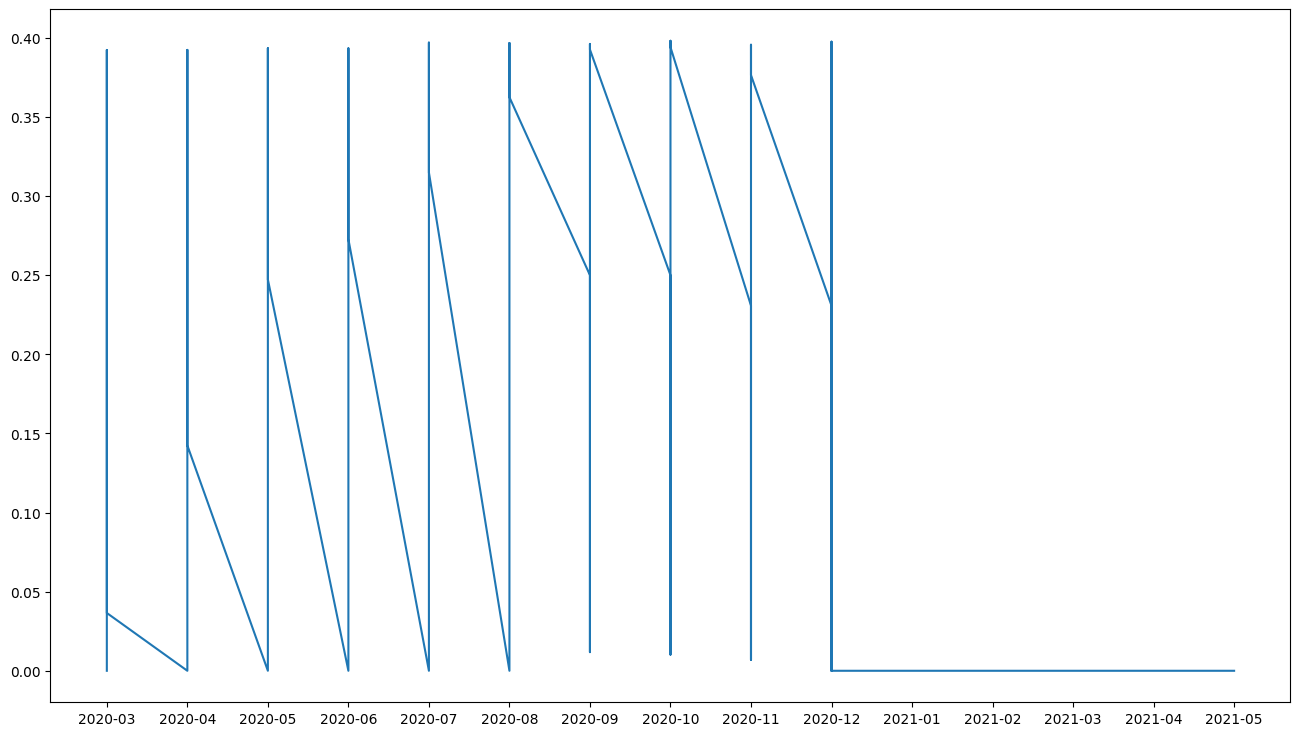

In [51]:
#3. Analyze the ratio of recoveries to confirmed cases for the United States on a monthly basis from March 2020 to May 2021. Which month experienced the highest recovery ratio, and what could be the potential reasons?

df_every_us=df_every[df_every['Country/Region']=='US']
df_every_2021=df_every_us['month'].isin(['2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05'])
df_every_2021=df_every_us[df_every_2021]
df_every_2021['ratio']=df_every_2021['Recovered']/df_every_2021['Confirmed']
df_every_2021

plt.figure(figsize=(16,9))
plt.plot(df_every_2021['month'],df_every_2021['ratio'])
plt.show()
